# Import libraries

In [10]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score



# Data Loading

In [11]:
csv_file_path = '/home/souvik/Documents/Code/Python/Machine-Learning-Lab/Clustering/CC GENERAL.csv'  # e.g., 'C:/Users/YourName/data.csv'
df = pd.read_csv(csv_file_path)

# Print column names
print("Available columns in the CSV:", df.columns.tolist())

# Extract numerical features
X = df.select_dtypes(include=['float64', 'int64']).values

# Set number of clusters (adjust as needed, e.g., based on elbow method or domain knowledge)
n_clusters = 3  # Example: set to 3 clusters; modify as needed

# Create DataFrame for visualization
df_vis = df.select_dtypes(include=['float64', 'int64'])

Available columns in the CSV: ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


# Data visualization 

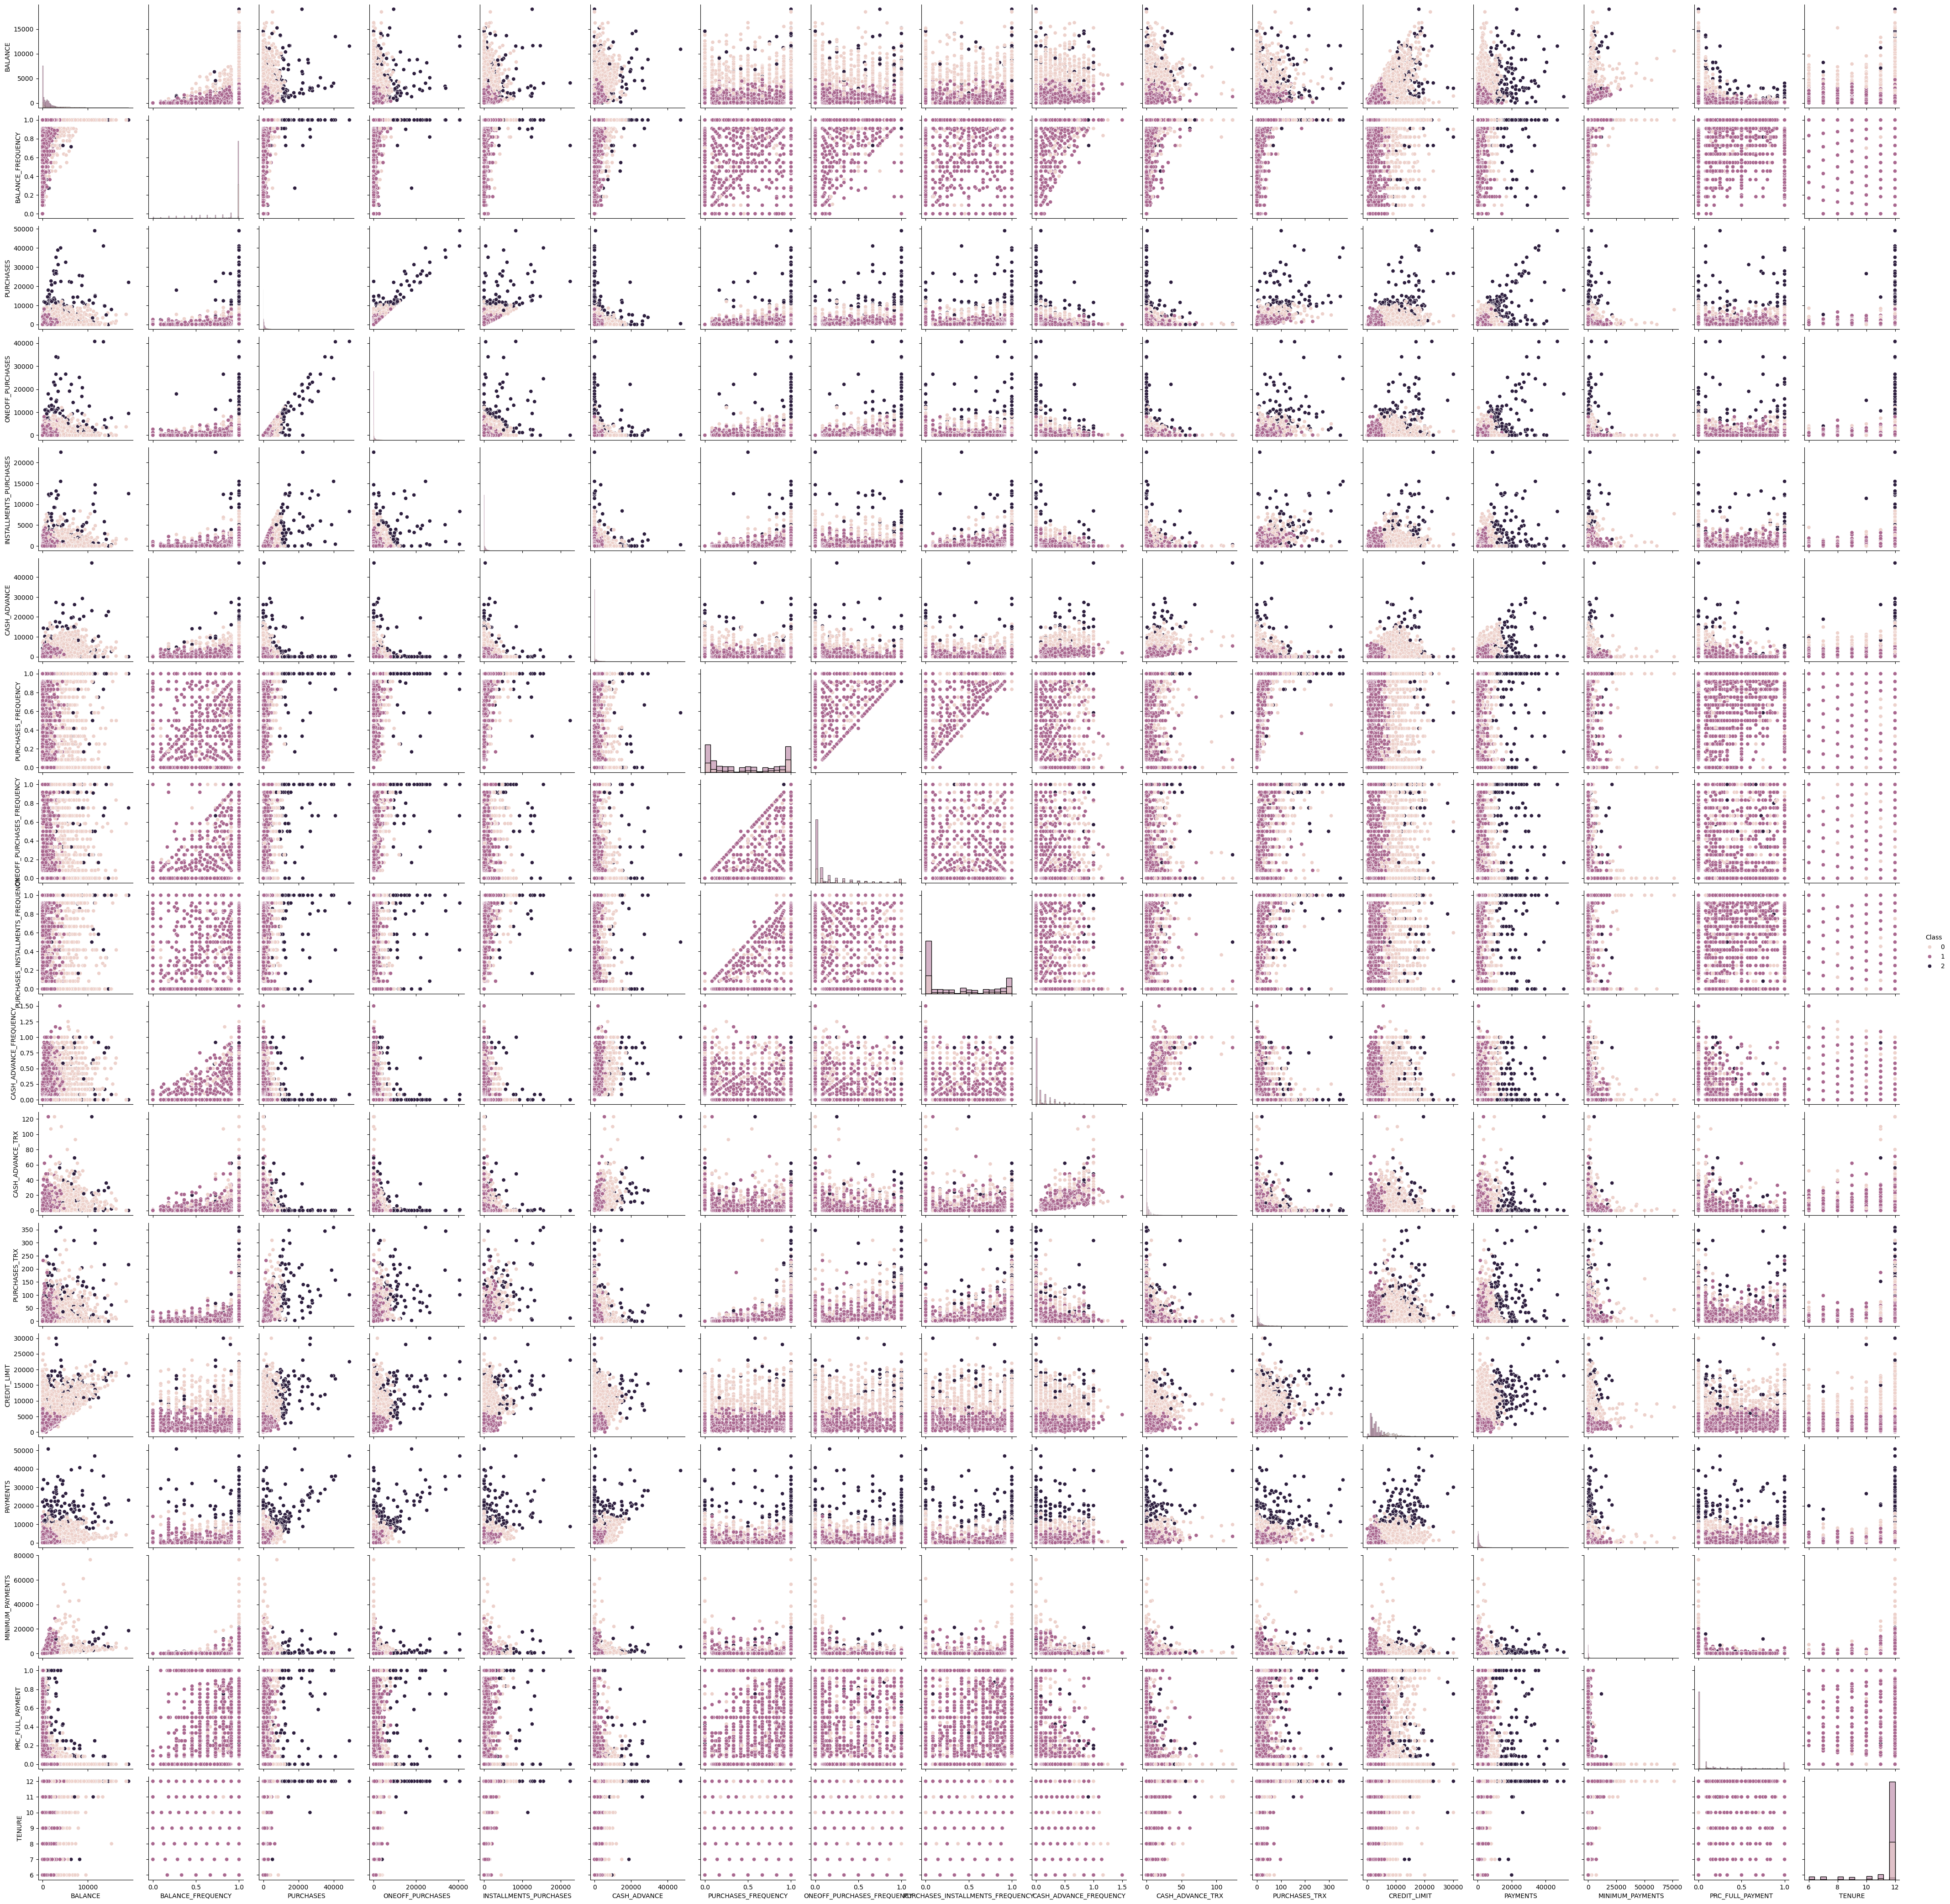

In [12]:
# Fill NaN values in X with column means
import numpy as np

X_filled = np.where(np.isnan(X), np.nanmean(X, axis=0), X)

kmeans_temp = KMeans(n_clusters=n_clusters, random_state=42)
df_vis['Class'] = kmeans_temp.fit_predict(X_filled)  # Use K-Means labels for visualization
sns.pairplot(df_vis, hue='Class', diag_kind='hist')
plt.show()

/tmp/ipykernel_31081/4062217300.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


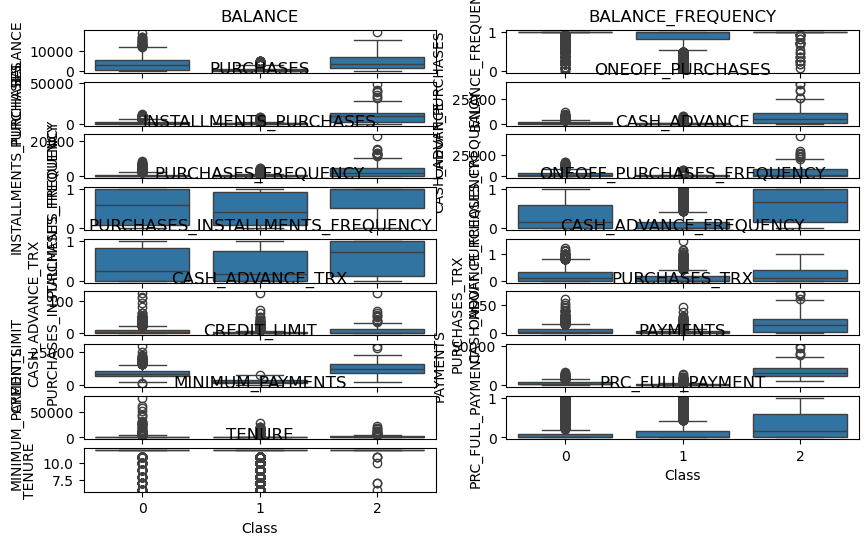

In [13]:

plt.figure(figsize=(10, 6))
for i, feature in enumerate(df_vis.columns[:-1]):  # Exclude 'Class'
    plt.subplot((len(df_vis.columns[:-1]) + 1) // 2, 2, i + 1)
    sns.boxplot(x='Class', y=feature, data=df_vis)
    plt.title(feature)
plt.tight_layout()
plt.show()

#  K-Means Clustering


In [16]:

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_filled)
# If you have true labels, replace 'y' with the correct variable. Otherwise, remove Adjusted Rand Index.
kmeans_metrics = {
    'Model': 'K-Means',
    'Silhouette Score': silhouette_score(X_filled, kmeans_labels),
    # 'Adjusted Rand Index': adjusted_rand_score(y, kmeans_labels),  # Uncomment if y is defined
    'Davies-Bouldin Index': davies_bouldin_score(X_filled, kmeans_labels)
}
print("K-Means Metrics:", kmeans_metrics)

K-Means Metrics: {'Model': 'K-Means', 'Silhouette Score': 0.4656068892025232, 'Davies-Bouldin Index': 1.1978279337702982}


#  Gaussian Mixture Model (GMM)


In [19]:
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_filled)
gmm_metrics = {
    'Model': 'GMM',
    'Silhouette Score': silhouette_score(X_filled, gmm_labels),
  
    'Davies-Bouldin Index': davies_bouldin_score(X_filled, gmm_labels)
}
print("GMM Metrics:", gmm_metrics)

GMM Metrics: {'Model': 'GMM', 'Silhouette Score': 0.0644987409775687, 'Davies-Bouldin Index': 3.493136424070864}


# Cluster Visualizaion

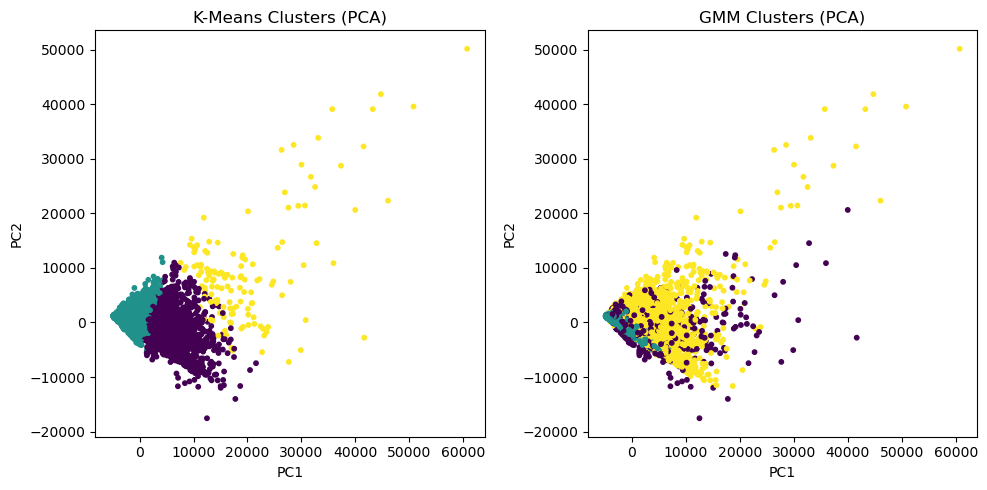

In [22]:
from sklearn.decomposition import PCA

# Visualize clusters using the first two principal components

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_filled)

plt.figure(figsize=(10, 5))

# K-Means clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title('K-Means Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# GMM clusters
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis', s=10)
plt.title('GMM Clusters (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()

# Results Comparison

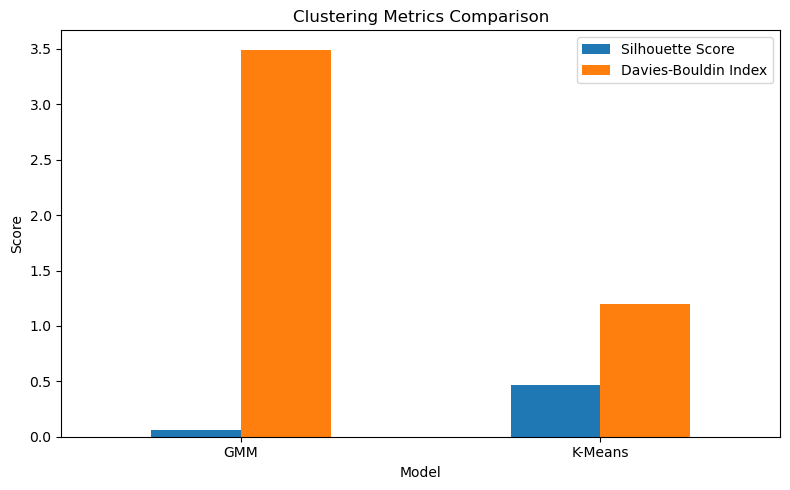

In [23]:
metrics_df.plot(kind='bar', figsize=(8, 5))
plt.title('Clustering Metrics Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.tight_layout()
plt.show()